In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [4]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT2.csv')
data.head()

,university,influence_on_teaching,influence_on_problem_solving,group_collaboration_usage,self_paced_learning_support,critical_thinking_support,career_guidance_support,data_privacy_concern,overreliance_harm_concern,perceived_creativity_reduction,learning_experience_improvement,education_level_Postgraduate,education_level_Undergraduate,academic_chatgpt_use_frequency_Daily,academic_chatgpt_use_frequency_Monthly,academic_chatgpt_use_frequency_Never,academic_chatgpt_use_frequency_Weekly
0,75,2,2,2,2,2,2,1,2,0,2,False,True,True,False,False,False
1,75,2,2,1,2,2,2,1,0,2,0,False,True,False,True,False,False
2,75,2,2,2,2,2,2,0,0,1,2,False,True,True,False,False,False
3,75,2,2,2,2,2,2,0,0,1,2,False,True,True,False,False,False
4,67,3,2,2,2,2,2,1,0,2,1,False,True,False,True,False,False


In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT2.csv')

# Only consider numeric columns for IQR
numeric_data = data.select_dtypes(include='number')

# Initialize outlier counter
total_outliers = 0
outlier_counts = {}

# Loop through each numeric column
for col in numeric_data.columns:
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = numeric_data[(numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)]
    count = outliers.shape[0]
    outlier_counts[col] = count
    total_outliers += count

# Show results
print("\nOutliers found in each numeric column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

print(f"\nTotal outliers detected across all columns: {total_outliers}")



Outliers found in each numeric column:
university: 0 outliers
influence_on_teaching: 257 outliers
influence_on_problem_solving: 453 outliers
group_collaboration_usage: 0 outliers
self_paced_learning_support: 557 outliers
critical_thinking_support: 653 outliers
career_guidance_support: 753 outliers
data_privacy_concern: 0 outliers
overreliance_harm_concern: 0 outliers
perceived_creativity_reduction: 0 outliers
learning_experience_improvement: 774 outliers

Total outliers detected across all columns: 3447


In [20]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT2.csv')

# Only consider numeric columns
numeric_data = data.select_dtypes(include='number')

# Create a DataFrame to count outliers per row
outlier_counts = pd.Series(0, index=numeric_data.index)

# Loop through each numeric column to count outliers
for col in numeric_data.columns:
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in this column
    is_outlier = (numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)

    # Increment outlier count for rows where this column has an outlier
    outlier_counts += is_outlier.astype(int)

# Select rows with 3 or more outliers
rows_with_3plus_outliers = data[outlier_counts >= 3]

# Show results
print(f"Total rows with 3 or more outliers: {rows_with_3plus_outliers.shape[0]}")
print("\nExample rows with 3 or more outliers:")
print(rows_with_3plus_outliers.head(10))


Total rows with 3 or more outliers: 395

Example rows with 3 or more outliers:
    university  influence_on_teaching  influence_on_problem_solving  \
6           75                      3                             2   
9          117                      3                             0   
11          75                      3                             2   
13          79                      0                             2   
14          67                      0                             1   
17          85                      3                             1   
26          75                      3                             0   
27          75                      2                             0   
30          75                      2                             1   
36          62                      3                             0   

    group_collaboration_usage  self_paced_learning_support  \
6                           1                            1   
9              

In [23]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT2.csv')

# Select numeric columns only for IQR calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate IQR for numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers: True where value is an outlier
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

# Count number of outliers in each row
outliers_per_row = outliers.sum(axis=1)

# Filter rows with less than 3 outliers (keep these)
cleaned_data = data[outliers_per_row < 3].reset_index(drop=True)

# Save cleaned data
cleaned_data.to_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT3.csv', index=False)

print(f"Original data rows: {len(data)}")
print(f"Cleaned data rows after removing rows with 3 or more outliers: {len(cleaned_data)}")


Original data rows: 3510
Cleaned data rows after removing rows with 3 or more outliers: 3115


In [45]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT2.csv')

# Select numeric columns only for IQR calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate IQR for numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers: True where value is an outlier
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

# Count number of outliers in each row
outliers_per_row = outliers.sum(axis=1)

# Filter rows with less than 3 outliers (keep these)
cleaned_data = data[outliers_per_row < 2].reset_index(drop=True)

# Save cleaned data
cleaned_data.to_csv('/content/drive/MyDrive/bangladesh_student/Impact_Chat3.csv', index=False)

print(f"Original data rows: {len(data)}")
print(f"Cleaned data rows after removing rows with 2 or more outliers: {len(cleaned_data)}")


Original data rows: 3510
Cleaned data rows after removing rows with 2 or more outliers: 2684



Feature Importance Scores (PCA-IG mapped to original features):
critical_thinking_support                 0.062166
data_privacy_concern                      0.059536
group_collaboration_usage                 0.039997
university                                0.037255
perceived_creativity_reduction            0.028439
academic_chatgpt_use_frequency_Monthly    0.025861
influence_on_teaching                     0.021607
academic_chatgpt_use_frequency_Weekly     0.021575
education_level_Undergraduate             0.018222
education_level_Postgraduate              0.018222
academic_chatgpt_use_frequency_Never      0.018068
career_guidance_support                   0.015379
self_paced_learning_support               0.014515
academic_chatgpt_use_frequency_Daily      0.007467
influence_on_problem_solving              0.005134
overreliance_harm_concern                 0.002771
dtype: float64

Selected Features (Threshold-Based Selection):
critical_thinking_support                 0.062166
data_

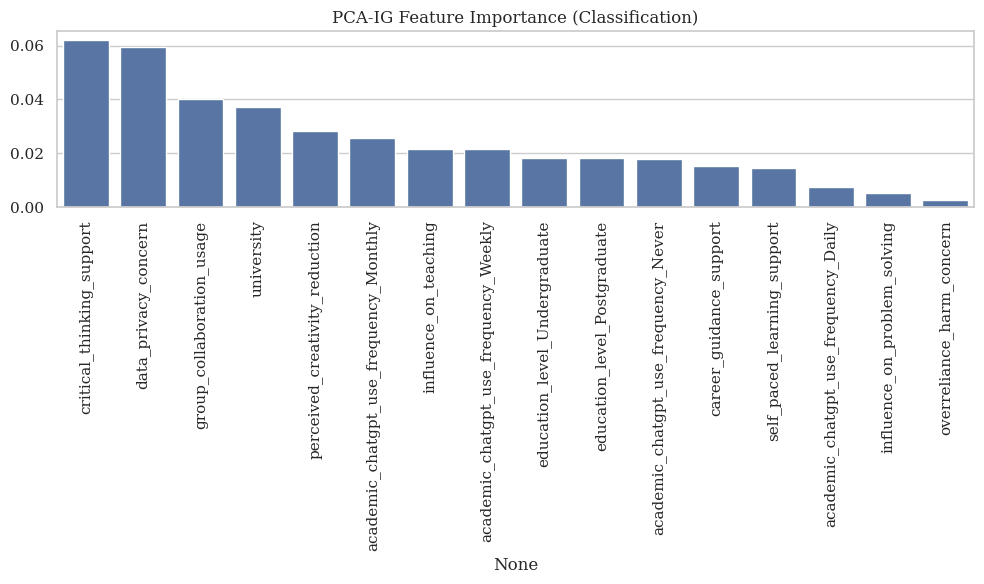


Mean F1 Macro Score (5-fold CV using Top-10 Features): 0.4406


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_Chat3.csv')

# Split features and target
X = data.drop('learning_experience_improvement', axis=1)
y = data['learning_experience_improvement']

# Encode target if categorical
if y.dtype == 'O':
    y = LabelEncoder().fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Mutual Information on PCA components
mi = mutual_info_classif(X_pca, y, discrete_features=False)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Map PCA importance back to original features
loadings = pca.components_
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print Feature Importance Scores
print("\nFeature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_series)

# Threshold-Based Feature Selection
threshold = 0.002
selected_threshold = pca_ig_series[pca_ig_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_threshold)

# Top-N Feature Selection
top_n = 10
selected_top_n = pca_ig_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_top_n)

# Cumulative Importance-Based Selection
cumulative_importance = pca_ig_series.cumsum() / pca_ig_series.sum()
selected_cumulative = pca_ig_series[cumulative_importance <= 0.90]
print(f"\nSelected Features (Cumulative Importance up to 90.0%):")
print(selected_cumulative)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_series.index, y=pca_ig_series.values)
plt.title('PCA-IG Feature Importance (Classification)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Train and evaluate Random Forest on top N features (example)
X_selected = X[selected_top_n.index]
clf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_selected, y, cv=cv, scoring='f1_macro')
print(f"\nMean F1 Macro Score (5-fold CV using Top-{top_n} Features): {np.mean(scores):.4f}")


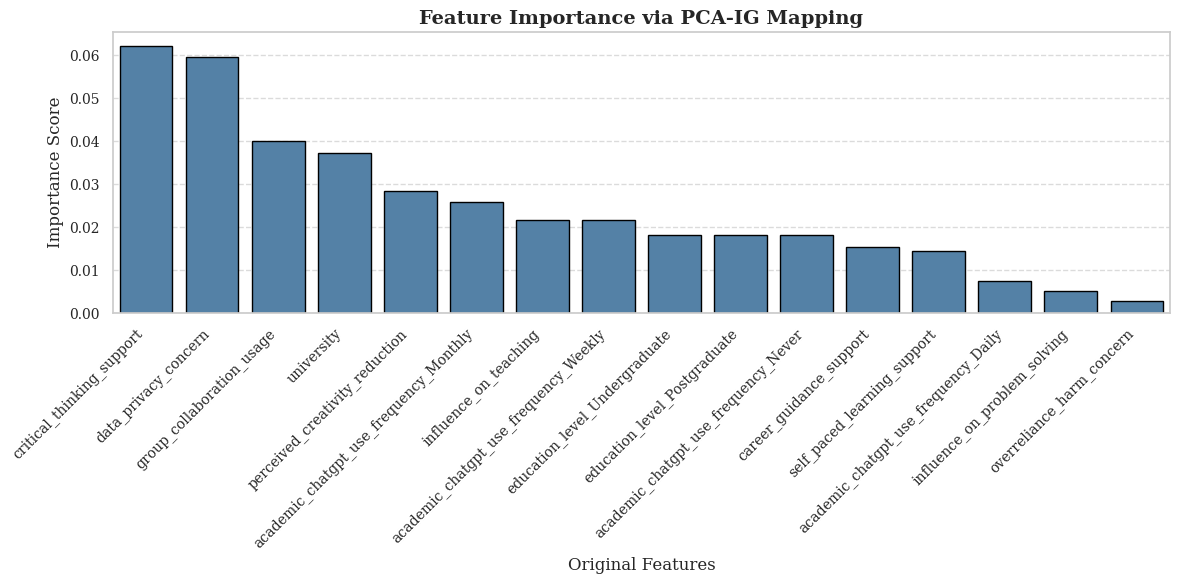

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid', font='serif', context='notebook')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=pca_ig_series.index, y=pca_ig_series.values, color='steelblue', edgecolor='black')

# Title and labels
plt.title('Feature Importance via PCA-IG Mapping', fontsize=14, weight='bold')
plt.xlabel('Original Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)

# Ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Save directly into your Drive folder
plt.savefig('/content/drive/MyDrive/bangladesh_student/up_chat_importance.pdf', dpi=700, format='pdf')

# Show plot
plt.show()


In [63]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_Chat4.csv')
data.head()

,university,influence_on_teaching,group_collaboration_usage,critical_thinking_support,data_privacy_concern,perceived_creativity_reduction,learning_experience_improvement,education_level_Postgraduate,education_level_Undergraduate,academic_chatgpt_use_frequency_Monthly,academic_chatgpt_use_frequency_Never,academic_chatgpt_use_frequency_Weekly
0,75,2,2,2,1,0,2,False,True,False,False,False
1,75,2,1,2,1,2,0,False,True,True,False,False
2,75,2,2,2,0,1,2,False,True,False,False,False
3,75,2,2,2,0,1,2,False,True,False,False,False
4,67,3,2,2,1,2,1,False,True,True,False,False


In [30]:
data

,university,influence_on_teaching,influence_on_problem_solving,group_collaboration_usage,self_paced_learning_support,critical_thinking_support,career_guidance_support,data_privacy_concern,overreliance_harm_concern,perceived_creativity_reduction,learning_experience_improvement,education_level_Postgraduate,education_level_Undergraduate,academic_chatgpt_use_frequency_Daily,academic_chatgpt_use_frequency_Monthly,academic_chatgpt_use_frequency_Never,academic_chatgpt_use_frequency_Weekly
0,75,2,2,2,2,2,2,1,2,0,2,False,True,True,False,False,False
1,75,2,2,1,2,2,2,1,0,2,0,False,True,False,True,False,False
2,75,2,2,2,2,2,2,0,0,1,2,False,True,True,False,False,False
3,75,2,2,2,2,2,2,0,0,1,2,False,True,True,False,False,False
4,67,3,2,2,2,2,2,1,0,2,1,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,196,3,2,1,2,1,2,1,0,2,2,False,True,False,False,False,True
3111,196,2,2,1,2,2,2,3,0,1,2,False,True,False,False,False,True
3112,121,2,2,2,1,2,2,3,0,2,2,False,True,False,False,False,True
3113,121,3,0,0,1,2,2,1,0,2,2,False,True,False,True,False,False


In [64]:
# Split features and target
X = data.drop('learning_experience_improvement', axis=1)
y = data['learning_experience_improvement']

# Display the encoded dataset
print(X)
print(y)

      university  influence_on_teaching  group_collaboration_usage  \
0             75                      2                          2   
1             75                      2                          1   
2             75                      2                          2   
3             75                      2                          2   
4             67                      3                          2   
...          ...                    ...                        ...   
2679         196                      2                          1   
2680         196                      3                          1   
2681         196                      2                          1   
2682         121                      2                          2   
2683         121                      3                          2   

      critical_thinking_support  data_privacy_concern  \
0                             2                     1   
1                             2              

In [65]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Accuracy: 0.9106145251396648
Weighted Precision: 0.8292188133953372
Micro Precision: 0.9106145251396648
Macro Precision: 0.30353817504655495
Precision per class: [0.         0.         0.91061453]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00         2
           2       0.91      1.00      0.95       489

    accuracy                           0.91       537
   macro avg       0.30      0.33      0.32       537
weighted avg       0.83      0.91      0.87       537



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

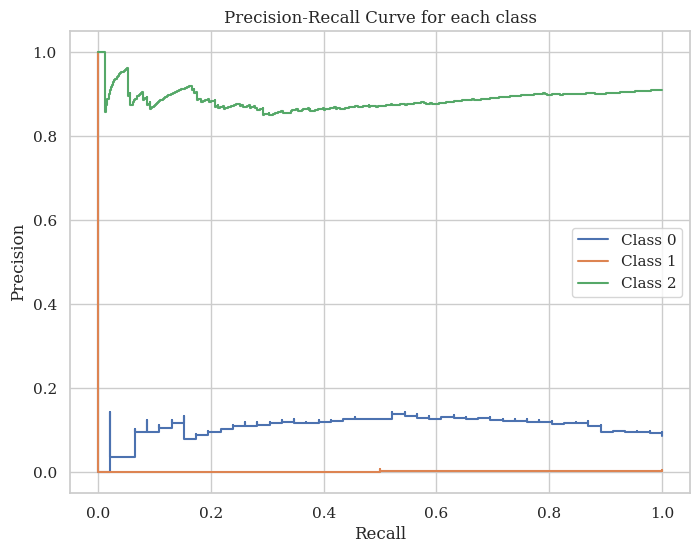

/tmp/ipython-input-60-520975820.py:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
/tmp/ipython-input-60-520975820.py:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


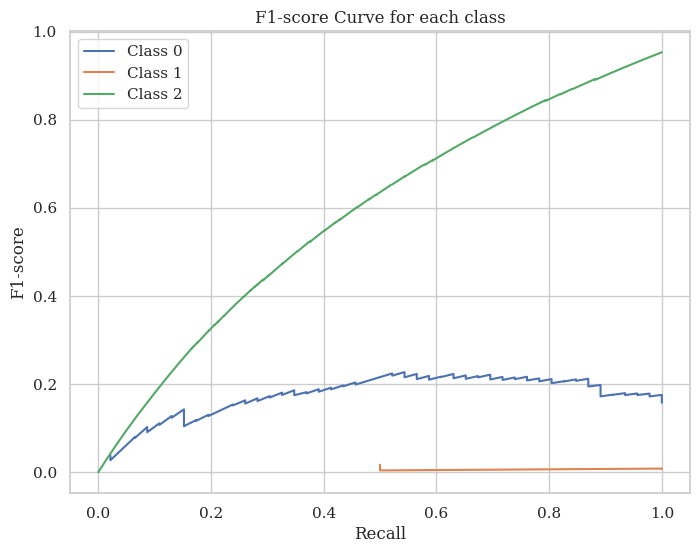

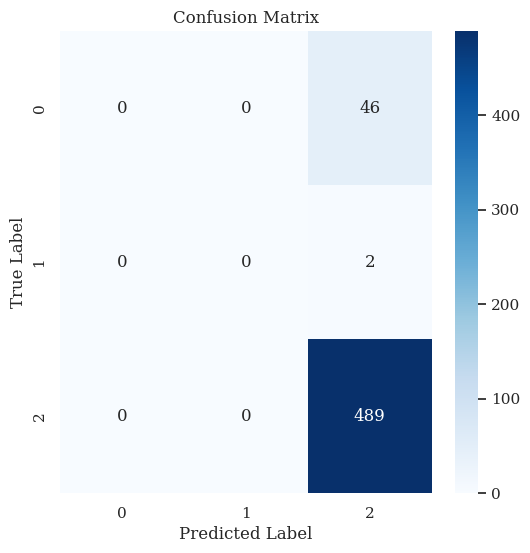

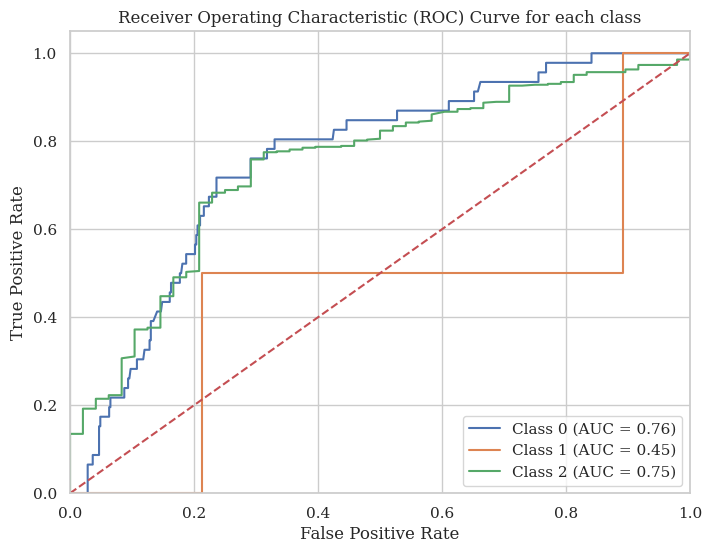

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the model
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = logistic_classifier.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs  # Use the calculated y_pred_probs
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs)
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9087523277467412
Weighted Precision: 0.8933111668359572
Micro Precision: 0.9087523277467412
Macro Precision: 0.49171401515151514
Precision per class: [0.54545455 0.         0.9296875 ]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.26      0.35        46
           1       0.00      0.00      0.00         2
           2       0.93      0.97      0.95       489

    accuracy                           0.91       537
   macro avg       0.49      0.41      0.43       537
weighted avg       0.89      0.91      0.90       537



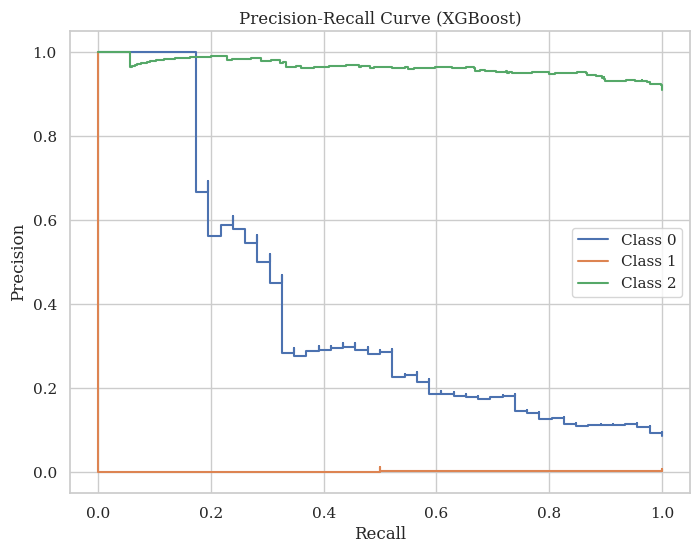

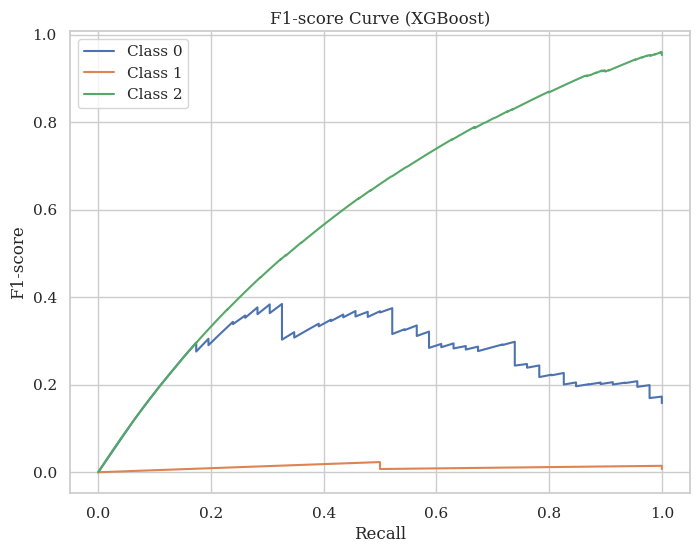

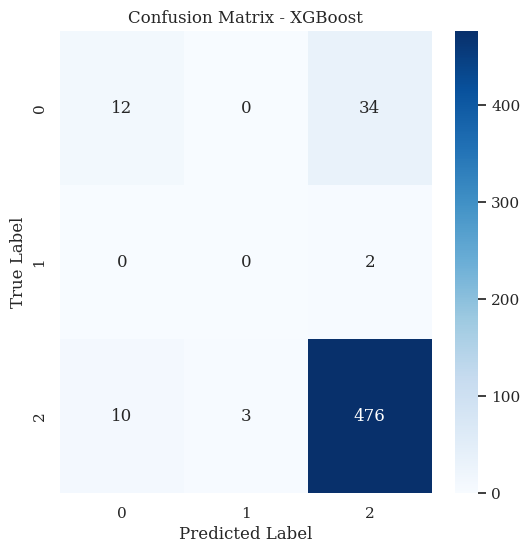

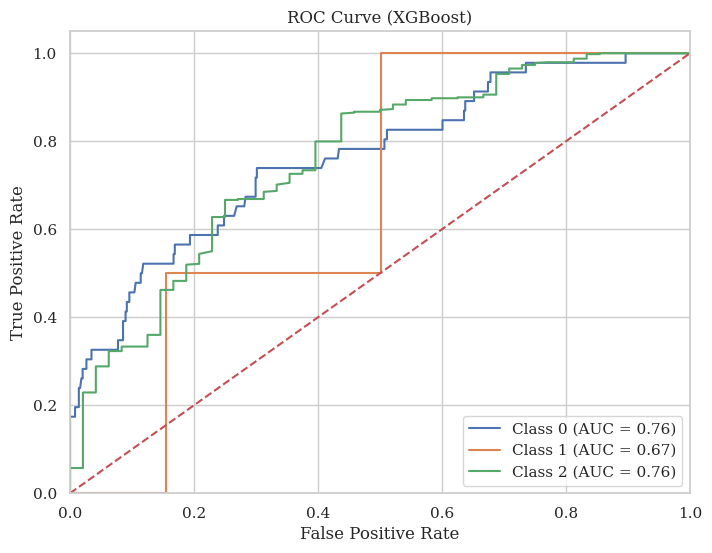

In [66]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBClassifier (with multiclass handling)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = xgb_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get class probabilities
y_pred_probs = xgb_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid divide by zero
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (XGBoost)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC Curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 1717, number of used features: 10
[LightGBM] [Info] Start training from score -2.521080
[LightGBM] [Info] Start training from score -4.740284
[LightGBM] [Info] Start training from score -0.093332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9143389199255121
Weighted Precision: 0.902973296308898
Micro Precision: 0.9143389199255121
Macro Precision: 0.5117223313686968
Precision per class: [0.6        0.         0.93516699]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.33      0.42        46
           1       0.00      0.00      0.00         2
           2       0.94      

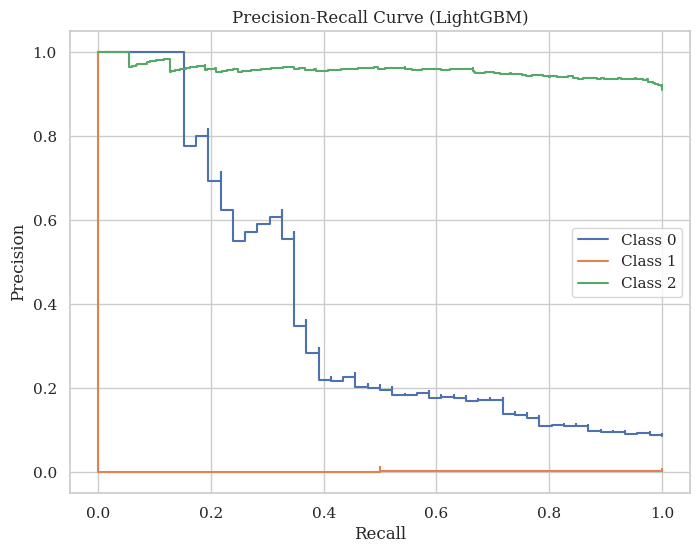

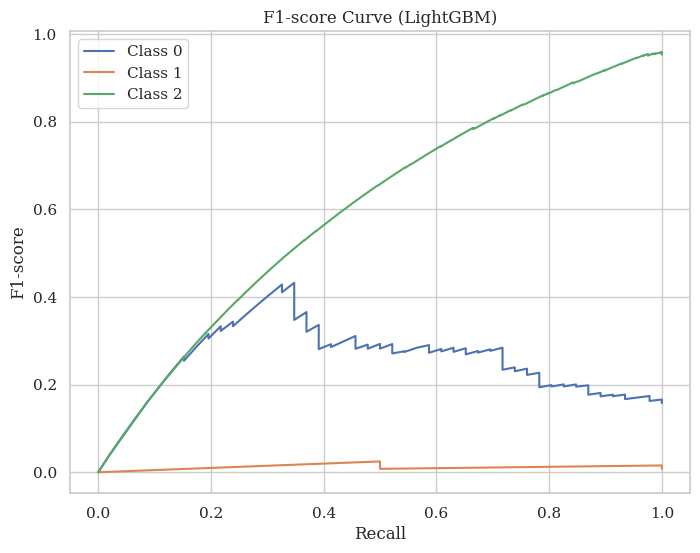

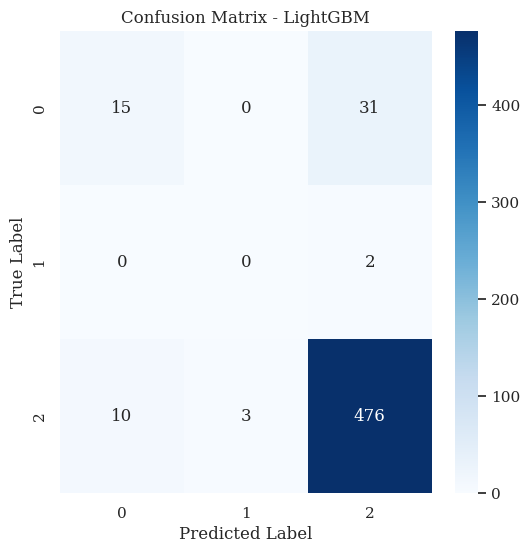

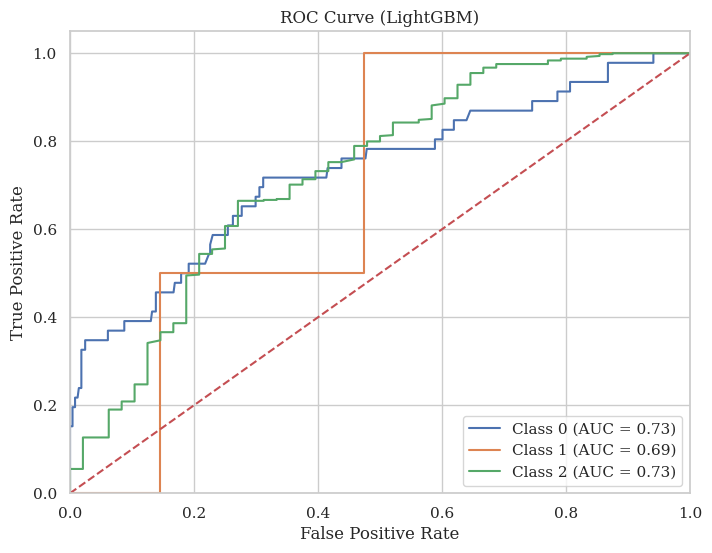

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)

# Initialize LightGBM classifier for multiclass
lgb_classifier = LGBMClassifier(objective='multiclass', random_state=42)
lgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = lgb_classifier.predict(X_test)
y_pred_probs = lgb_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curves
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LightGBM)')
plt.legend()
plt.show()

# F1-score Curves
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (LightGBM)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# ROC Curve and AUC per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LightGBM)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8975791433891993
Weighted Precision: 0.8805314650451677
Micro Precision: 0.8975791433891993
Macro Precision: 0.45008075913587725
Precision per class: [0.42307692 0.         0.92716535]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.24      0.31        46
           1       0.00      0.00      0.00         2
           2       0.93      0.96      0.94       489

    accuracy                           0.90       537
   macro avg       0.45      0.40      0.42       537
weighted avg       0.88      0.90      0.89       537



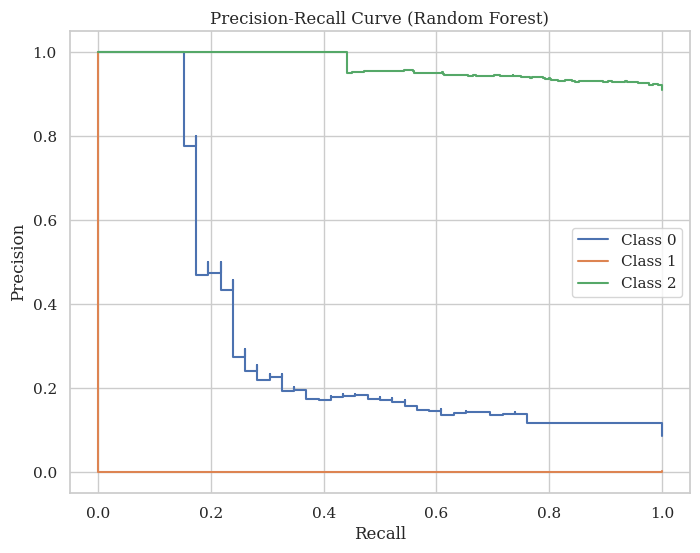

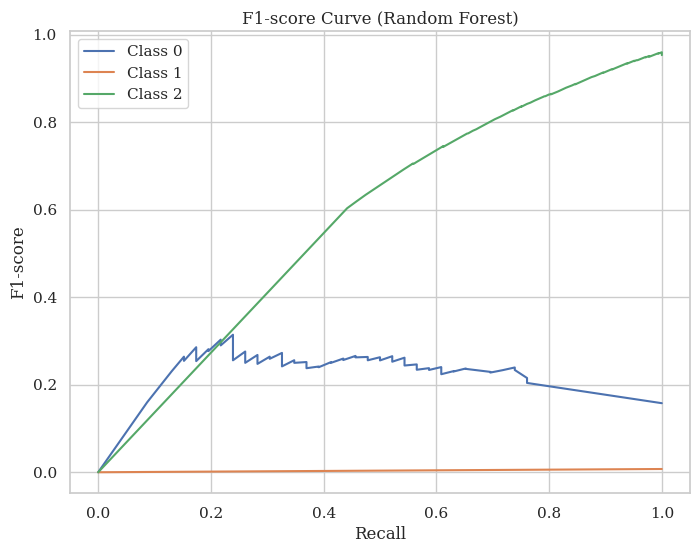

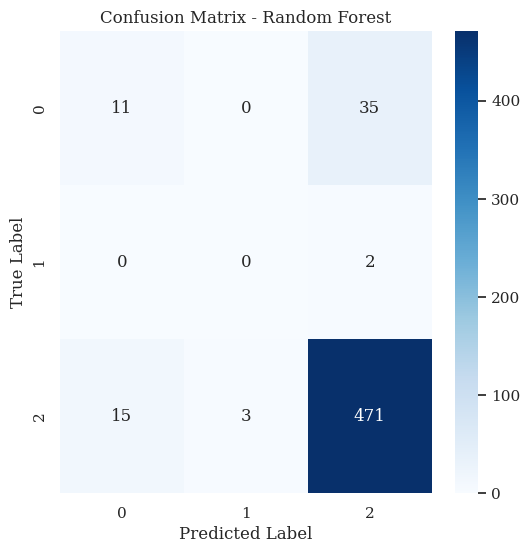

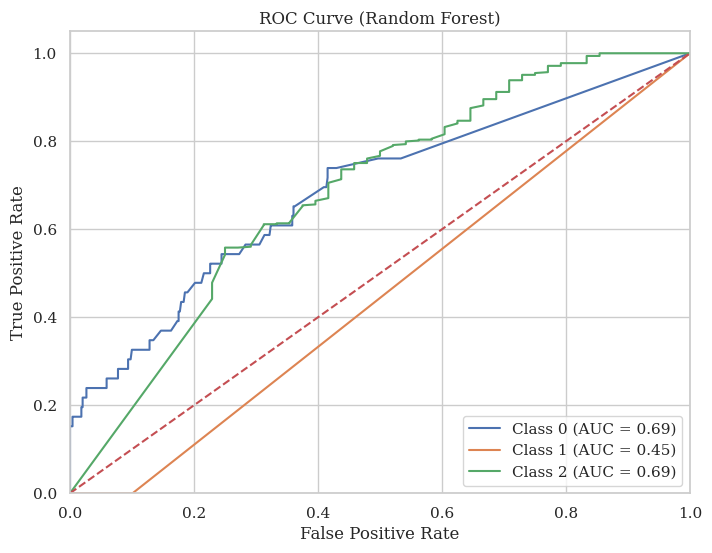

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)
y_pred_probs = rf_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (Random Forest)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9106145251396648
Weighted Precision: 0.8292188133953372
Micro Precision: 0.9106145251396648
Macro Precision: 0.30353817504655495
Precision per class: [0.         0.         0.91061453]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00         2
           2       0.91      1.00      0.95       489

    accuracy                           0.91       537
   macro avg       0.30      0.33      0.32       537
weighted avg       0.83      0.91      0.87       537



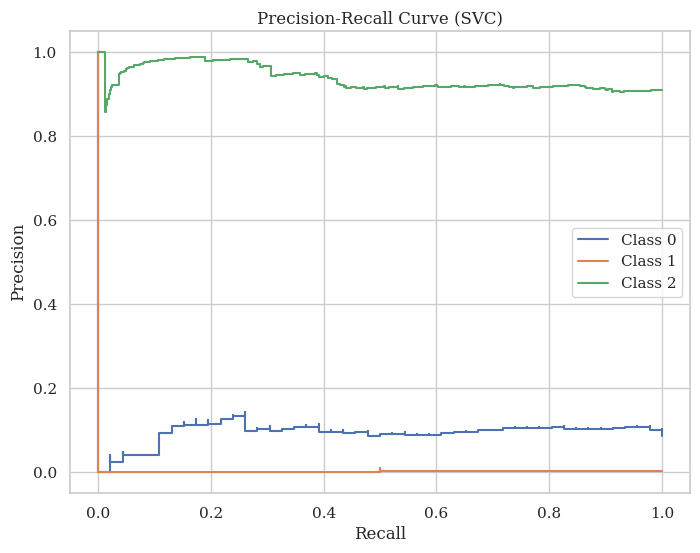

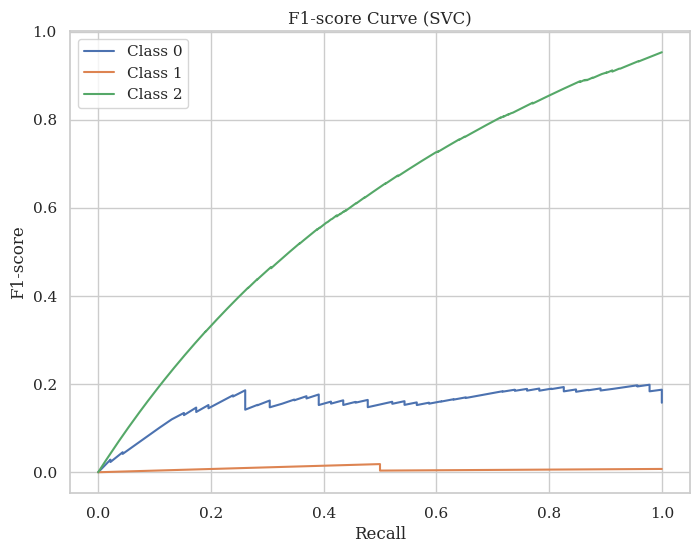

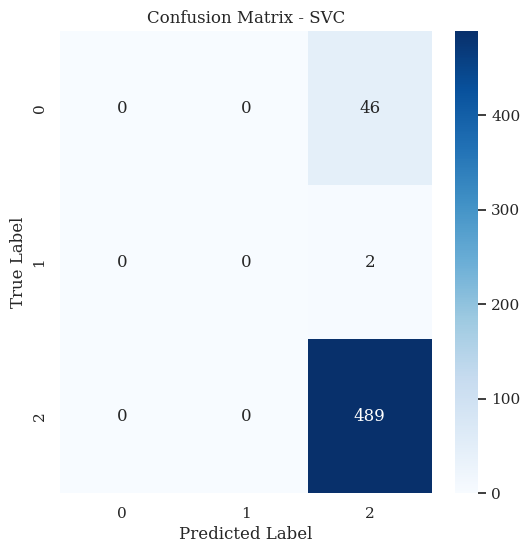

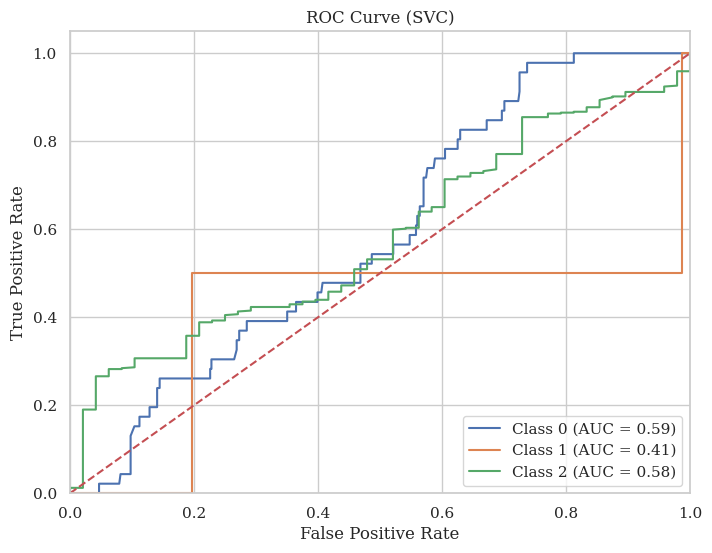

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import label_binarize

# Fit SVC with probability estimates enabled
svc_classifier = SVC(probability=True, kernel='rbf', random_state=42)
svc_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svc_classifier.predict(X_test)
y_pred_probs = svc_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVC)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (SVC)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVC')
plt.show()

# ROC Curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVC)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9199255121042831
Weighted Precision: 0.9118764022948697
Micro Precision: 0.9199255121042831
Macro Precision: 0.5926325247079963
Precision per class: [0.85714286 0.         0.92075472]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.13      0.23        46
           1       0.00      0.00      0.00         2
           2       0.92      1.00      0.96       489

    accuracy                           0.92       537
   macro avg       0.59      0.38      0.39       537
weighted avg       0.91      0.92      0.89       537



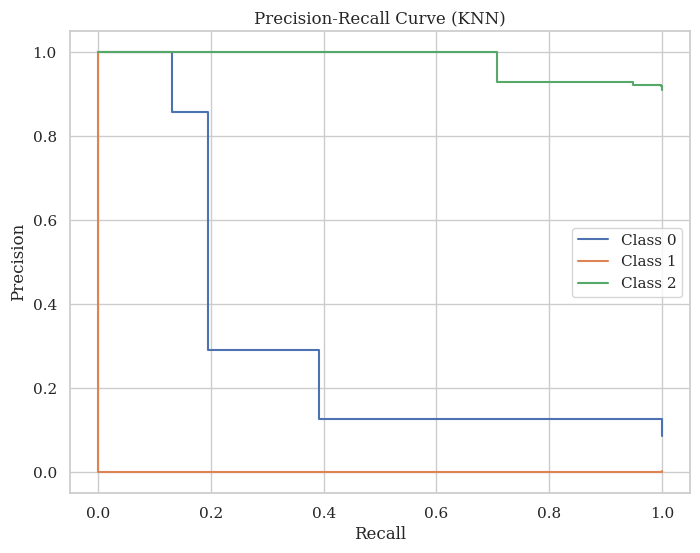

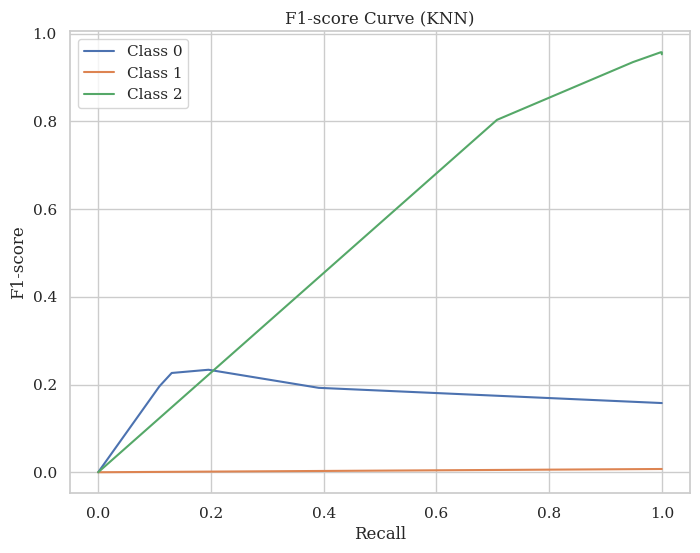

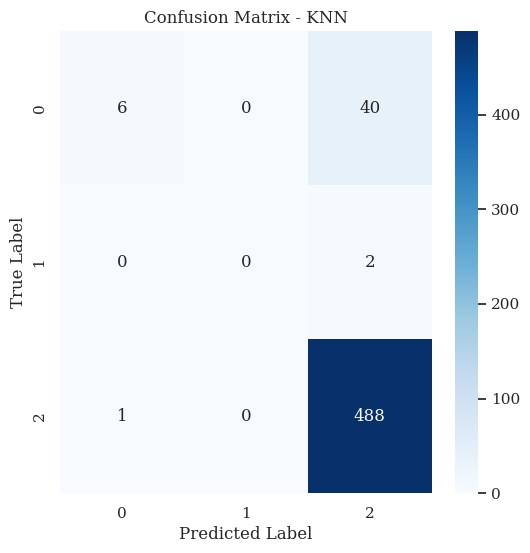

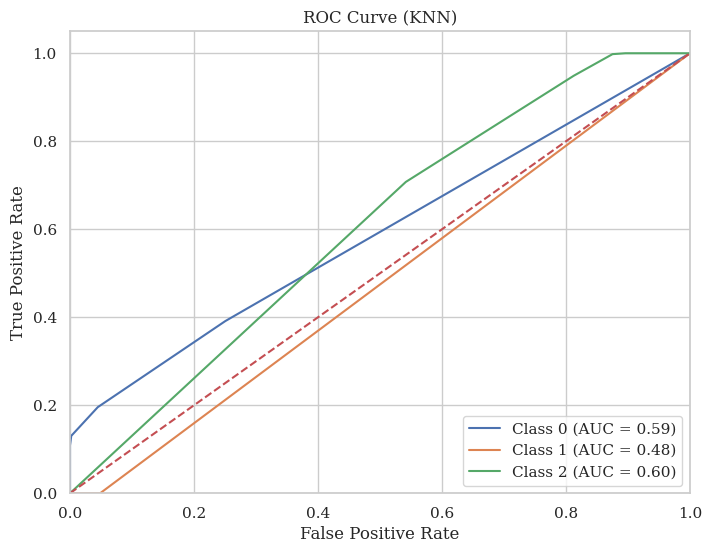

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)

# Initialize KNN (you can tune n_neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = knn_classifier.predict(X_test)
y_pred_probs = knn_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (KNN)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()

# ROC Curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend(loc="lower right")
plt.show()
